https://stepik.org/lesson/1370095/step/1

https://github.com/selfedu-rus/machine_learning/blob/main/machine_learning_12_L1.py

Формула сигмоидной функция потерь, соответствующая приведённому коду:

$$
\text{loss}(w, x, y) = \frac{2}{1 + e^{-(\mathbf{w} \cdot \mathbf{x} \cdot y)}}
$$

Формула для производной сигмоидной функции потерь по вектору весов $ w $:

$$
\frac{\partial L}{\partial w} = -2 \cdot (1 + e^{(\mathbf{w} \cdot \mathbf{x} \cdot y)})^{-2} \cdot e^{(\mathbf{w} \cdot \mathbf{x} \cdot y)} \cdot x \cdot y + L_1 \cdot \text{sign}(w)
$$

w = [ 0.011 -0.     0.064 -0.034  0.   ]
Q =  0.03464897137726948


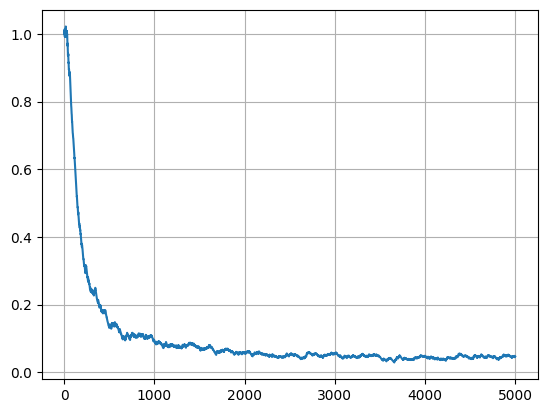

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# # производная сигмоидной функции потерь по вектору w
# def df(w, x, y):
#     L1 = 1.0
#     M = np.dot(w, x) * y
#     return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)

# Вариант если не изменяем w[0]
def df(w, x, y):
    L1 = 1.0
    M = np.dot(w, x) * y
    gradient = -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y
    regularization = L1 * np.sign(w[1:])  # Применяем только к w[1], w[2], ...
    return gradient + np.concatenate(([0], regularization))  # Не изменяем w[0]


# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

fn = len(x_train[0])
n_train = len(x_train)  # размер обучающей выборки
w = np.zeros(fn)        # начальные весовые коэффициенты
nt = 0.00001             # шаг сходимости SGD
lm = 0.01               # скорость "забывания" для Q
N = 5000                 # число итераций SGD
np.random.seed(0)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)       # случайный индекс
    ek = loss(w, x_train[k], y_train[k])        # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q                  # пересчет показателя качества
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)]) # истинное значение эмпирического риска после обучения
print('w =', w.round(3))
print('Q = ', Q)

plt.plot(Q_plot)
plt.grid(True)
plt.show()